# Lego Minifigures

# Setup

In [1]:
import os
import cv2
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import pandas as pd

# Read Metadata

In [2]:
# attached data tables
df_index = pd.read_csv("Data/index.csv")
df_meta = pd.read_csv("Data/metadata.csv")

In [3]:
# get classes
classes = df_meta["class_id"]
print(list(classes))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


# Read Images

In [4]:
# read images and get label for each image
# save trainings and validation images as numpy files
IMG_SIZE = 50
CLASSES = {} # ct nr of elements in each class
CLASSES_TRAIN = {}
CLASSES_VALID = {}
training_data = []
validation_data = []

# directories, where images are saved
# each directory has subdirectories
harry_potter = "harry-potter/"
jurassic_world = "jurassic-world"
marvel = "marvel"
star_wars = "star-wars"

directories = [harry_potter, jurassic_world, marvel, star_wars]

# get all directories
for directory in directories:
    for f in os.listdir(os.path.join("Data",directory)):
        # all images
        imgs = os.listdir(os.path.join("Data",directory, f))
        for img in tqdm(imgs):
            img_path = os.path.join(directory, f, img)
            img = cv2.imread(os.path.join("Data",img_path)) #read image as greyscale
            #plt.imshow(img)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            # compare path with index.csv to get the label
            label = df_index[df_index["path"]==img_path]["class_id"].values
            if label[0] not in CLASSES.keys():
                CLASSES[label[0]] = 0
            else:
                CLASSES[label[0]] += 1
            idx = df_index[df_index["path"]==img_path]["class_id"].index
            train_valid = df_index["train-valid"][idx].values
            if train_valid == "train":
                if label[0] not in CLASSES_TRAIN.keys():
                    CLASSES_TRAIN[label[0]] = 0
                else:
                    CLASSES_TRAIN[label[0]] += 1
                training_data.append([np.array(img), label])
            if train_valid == "valid":
                if label[0] not in CLASSES_VALID.keys():
                    CLASSES_VALID[label[0]] = 0
                else:
                    CLASSES_VALID[label[0]] += 1
                validation_data.append([np.array(img), label])

100%|██████████| 8/8 [00:00<00:00, 235.45it/s]


## Some Visualisations

classes: {19: 12, 18: 12, 27: 13, 26: 13, 3: 9, 15: 8, 17: 8, 29: 11, 4: 9, 21: 13, 16: 8, 2: 9, 24: 11, 1: 9, 23: 11, 25: 11, 20: 13, 22: 13, 28: 11, 7: 11, 9: 13, 11: 7, 8: 12, 13: 7, 10: 9, 6: 11, 5: 11, 12: 7, 14: 7}


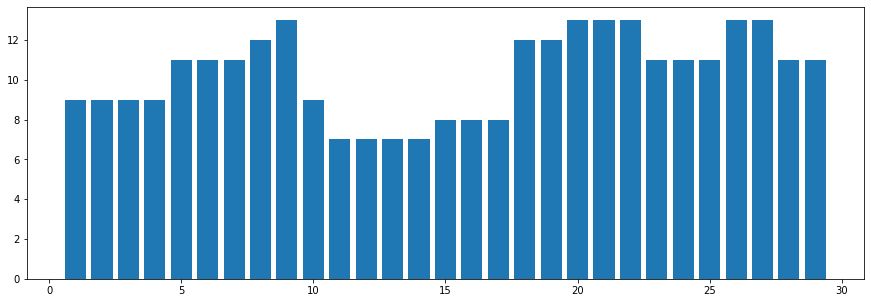

In [5]:
# plot nr elements in each class
print(f"classes: {CLASSES}")
x = CLASSES.keys()
y = CLASSES.values()
fig = plt.figure(figsize=(15,5))
plt.bar(x,y);

classes: {19: 6, 18: 6, 27: 6, 26: 6, 3: 4, 15: 4, 17: 4, 29: 5, 4: 4, 21: 6, 16: 4, 2: 4, 24: 5, 1: 4, 23: 5, 25: 5, 20: 6, 22: 6, 28: 5, 7: 6, 9: 6, 11: 3, 8: 6, 13: 3, 10: 4, 6: 6, 5: 6, 12: 3, 14: 3}


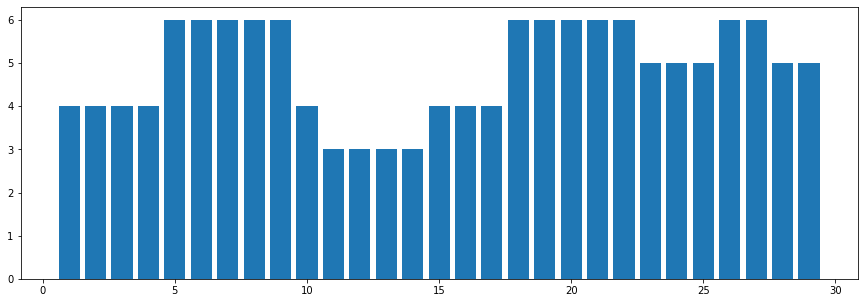

In [6]:
# plot nr elements in each class in training data
print(f"classes: {CLASSES_TRAIN}")
x = CLASSES_TRAIN.keys()
y = CLASSES_TRAIN.values()
fig = plt.figure(figsize=(15,5))
plt.bar(x,y);

classes: {19: 5, 18: 5, 27: 6, 26: 6, 3: 4, 15: 3, 17: 3, 29: 5, 4: 4, 21: 6, 16: 3, 2: 4, 24: 5, 1: 4, 23: 5, 25: 5, 20: 6, 22: 6, 28: 5, 7: 4, 9: 6, 11: 3, 8: 5, 13: 3, 10: 4, 6: 4, 5: 4, 12: 3, 14: 3}


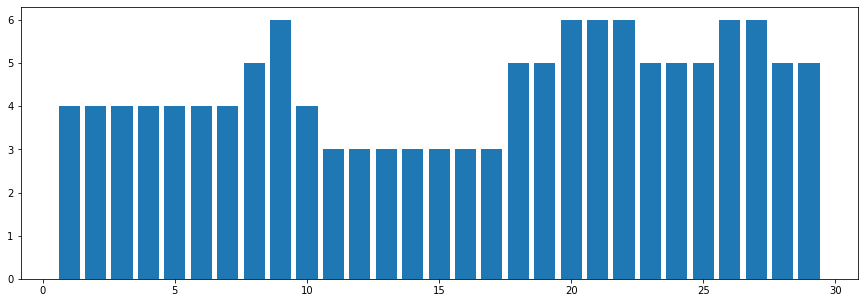

In [7]:
# plot nr elements in each class in validation data
print(f"classes: {CLASSES_VALID}")
x = CLASSES_VALID.keys()
y = CLASSES_VALID.values()
fig = plt.figure(figsize=(15,5))
plt.bar(x,y);

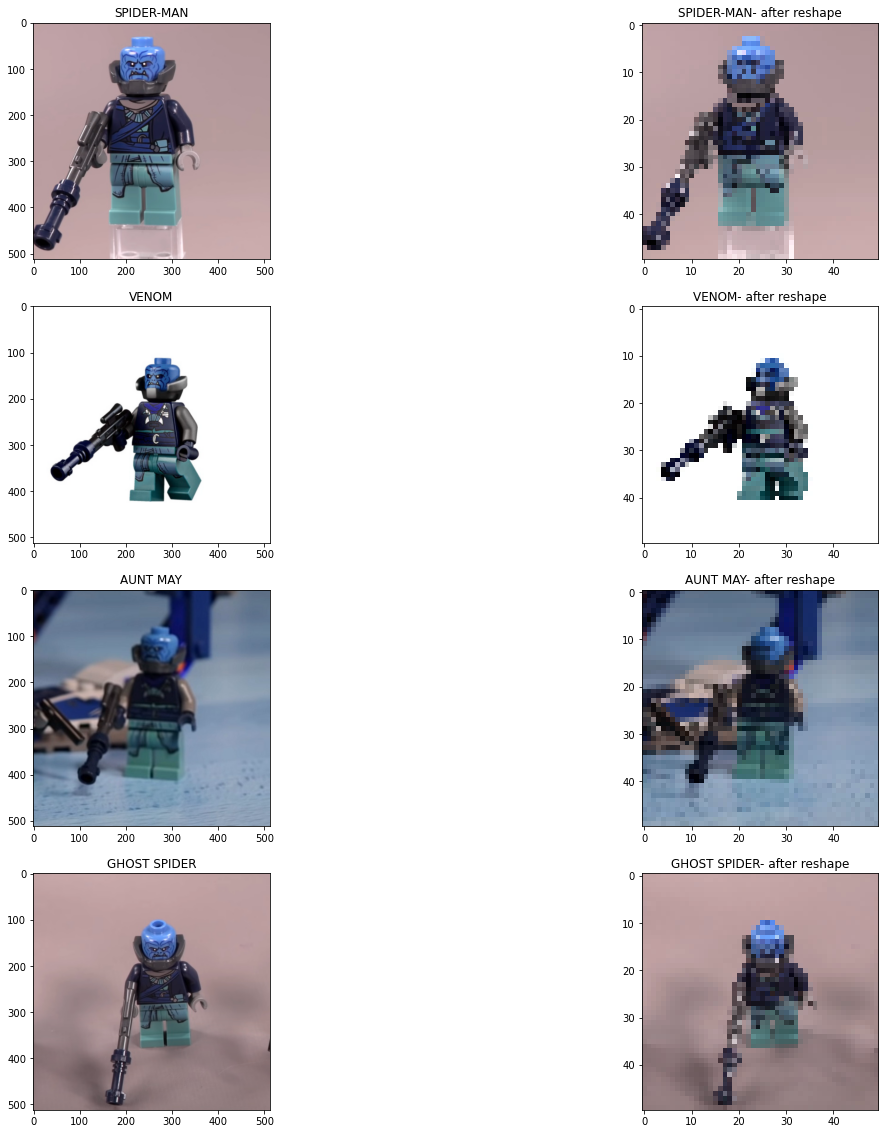

In [8]:
# plot some images
nrow = 4
ncol = 2
fig, axes = plt.subplots(nrow,ncol,figsize=(20,20))

for directory in directories:
    for f in os.listdir(os.path.join("Data",directory)):
        # all images
        imgs = os.listdir(os.path.join("Data",directory, f))
        for i,img in enumerate(imgs):
            img_path = os.path.join(directory, f, img)
            img = cv2.imread(os.path.join("Data",img_path)) #read image as greyscale
            name = df_meta["minifigure_name"][i]
            axes[i,0].imshow(img)
            axes[i,0].set_title(name)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            axes[i,1].imshow(img)
            axes[i,1].set_title(name + "- after reshape")
            if i == (nrow-1):
                break

In [9]:
# save training and validation data as numpy array
np.save("Data/training_data", training_data)
np.save("Data/validation_data", validation_data)

/home/frauke/anaconda3/envs/pytorch_base/lib/python3.7/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
